In [1]:
import numpy as np
import pandas as pd

## Step 1: Reading the Data and understanding the Data

In [2]:
#loading the data
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#checking data shape and null factors
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- <strong>Shape and info shows the same number for all columns so there are no null values. No need to run isnull().sum()</strong>

In [5]:
#looking around the scale
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#dropping the index column, no use in our analysis
bike = bike.drop(['instant'], axis=1)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#renaming some of the wierd column names to something more readable. 

bike = bike.rename(columns={'cnt': 'demand', 'weathersit': 'weather', 'mnth': 'month', 'dteday': 'date'})
bike.head()

,date,season,yr,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,demand
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# drop the date column
bike = bike.drop('date', axis=1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weather     730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  demand      730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [9]:
# The sum of Registered and Causual is a division  of our target variable, so it is not a factor we can drop them.
bike = bike.drop(['casual', 'registered'], axis=1)
bike.head()

,season,yr,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,demand
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


As per the data dictionary, we can consider these variables to be categorical
- yr
- month
- season 
- weather
- weekday
- workday
- holiday

In [11]:
#replacing Data Dictionary Values in Categorical Variables.
bike['yr'] = bike['yr'].replace({0: 2018, 1:2019})
bike['month'] = bike['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec' })
bike['season'] = bike['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike['weather'] = bike['weather'].replace({1: 'clear', 2: 'mist', 3: 'light_snow_rain', 4: 'heavy_snow_rain'})
bike['weekday'] = bike['weekday'].replace({0: 'mon', 1: 'tue', 2: 'wed', 3: 'thr', 4: 'fri', 5: 'sat', 6: 'sun'})
bike['workingday'] = bike['workingday'].replace({0: 'no', 1: 'yes'})
bike['holiday'] = bike['holiday'].replace({0: 'no', 1: 'yes'})
bike.head()

,season,yr,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,demand
0,spring,2018,Jan,no,sun,no,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,no,mon,no,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,no,tue,yes,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,no,wed,yes,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,no,thr,yes,clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
#Convert variables to object type
bike['month']=bike['month'].astype(object)
bike['season']=bike['season'].astype(object)
bike['weather']=bike['weather'].astype(object)
bike['weekday']=bike['weekday'].astype(object)
bike['yr']=bike['yr'].astype(object)
bike['workingday']=bike['workingday'].astype(object)
bike['holiday']=bike['holiday'].astype(object)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  demand      730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


## Step 2: Visualizing the Data to see if Linear Regression is feasible

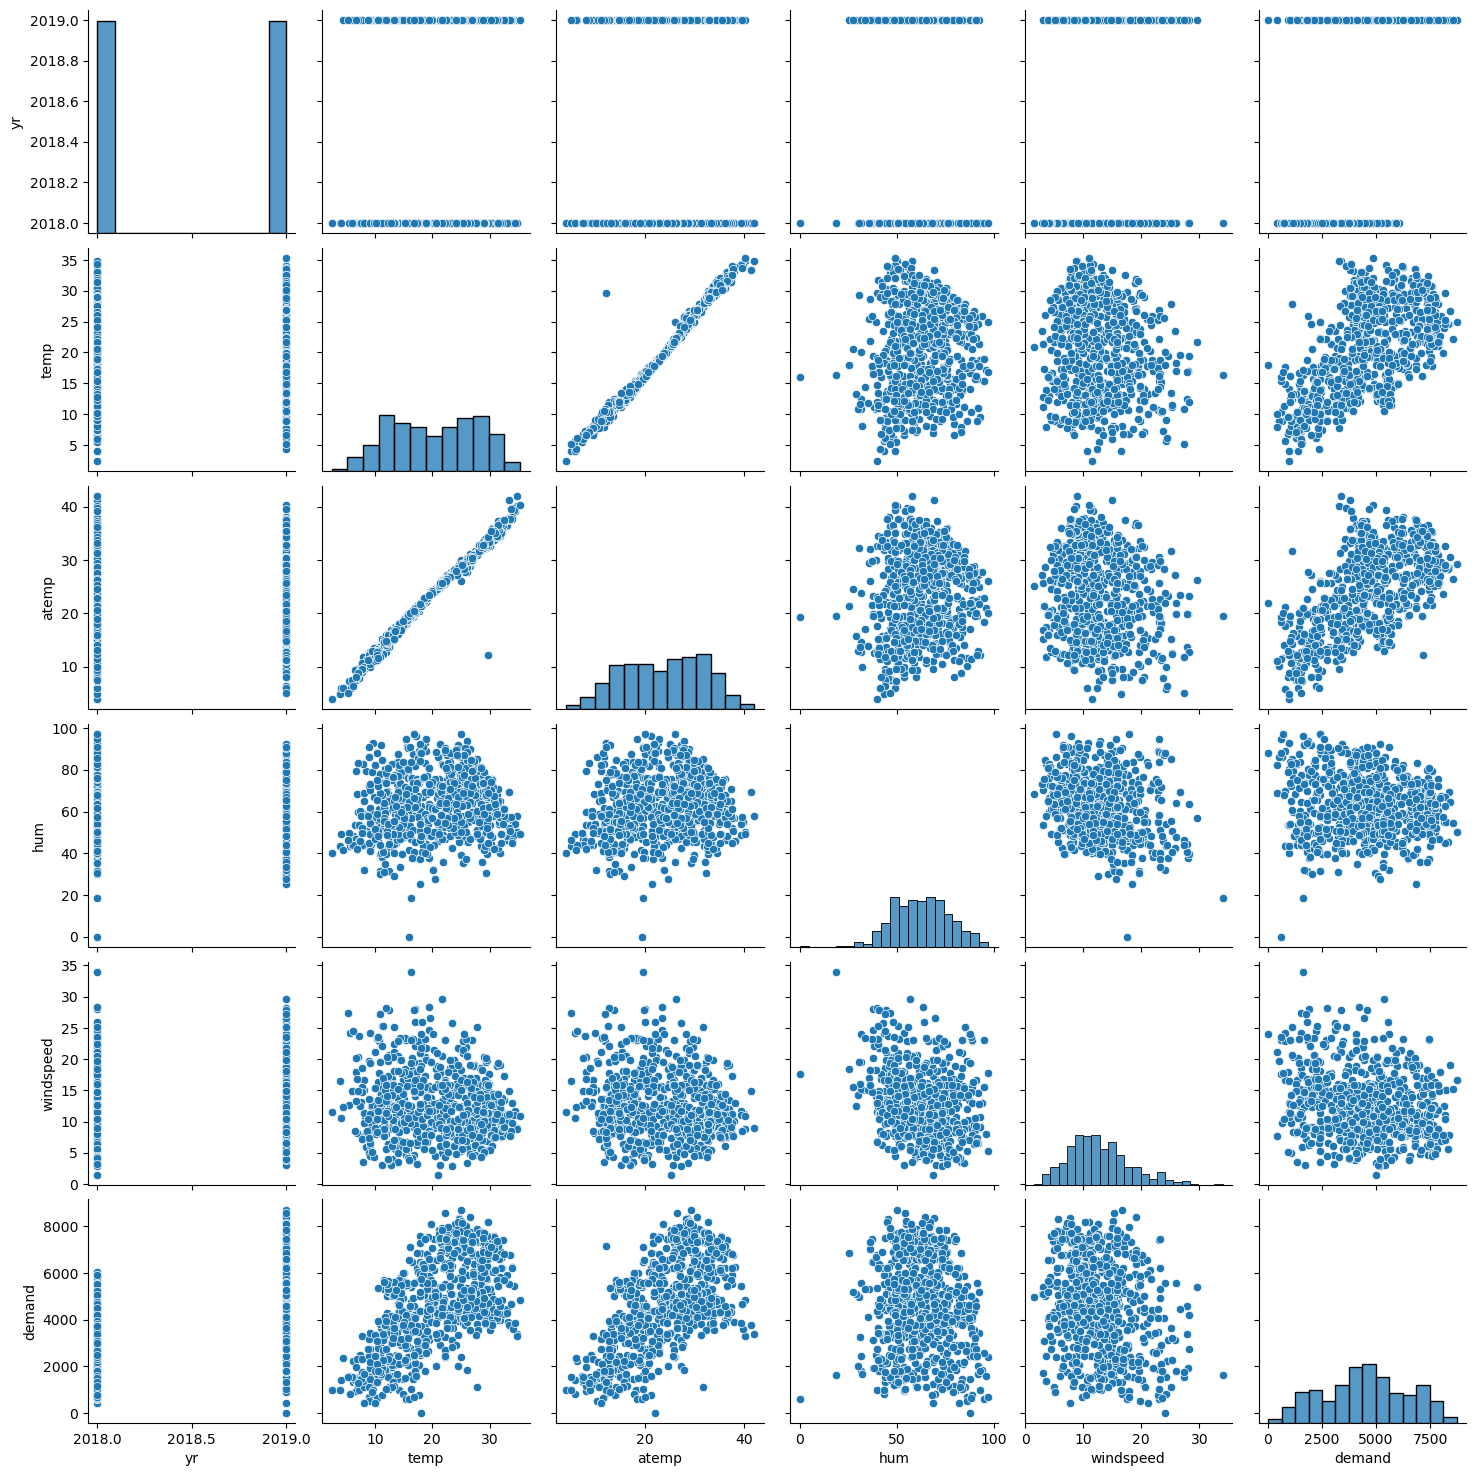

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(bike)
plt.show()

### Focucing on the plots for cnt or demand after the rename (our target variable), it seems like many variables has a linear relation with demand like  atemp temp etc. So we can conclude that a Linear Regression Model can be applied in this senario.

### Visualizing the Categorical Variables.



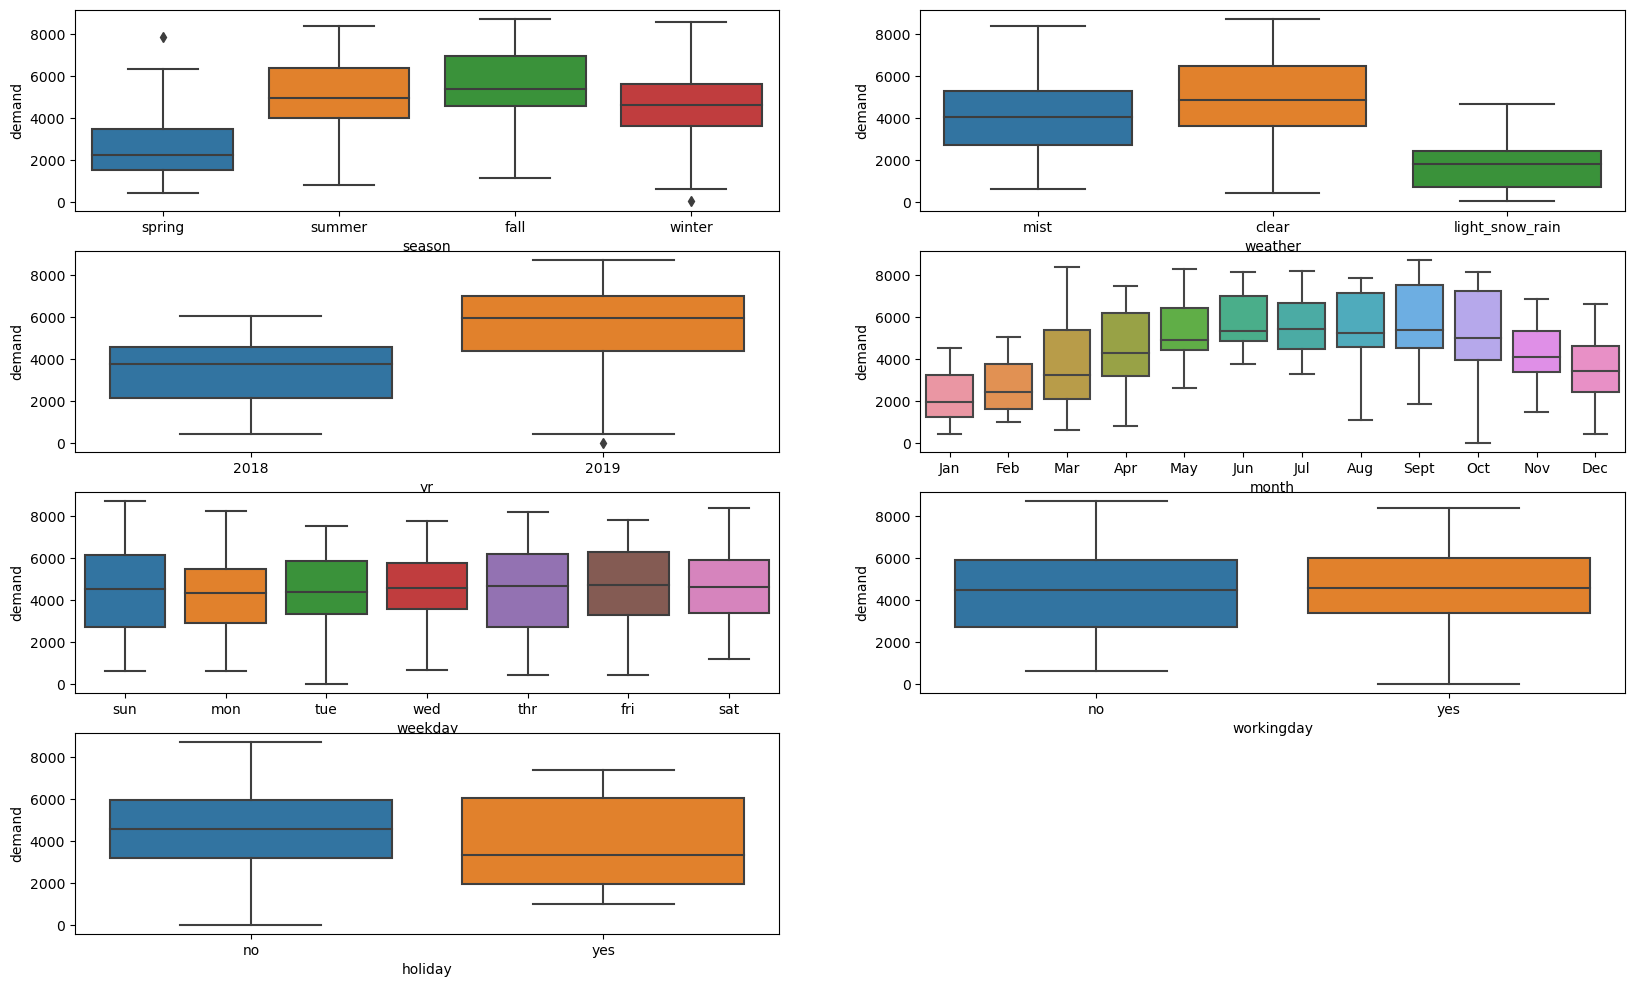

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'demand', data = bike)

plt.subplot(4,2,2)
sns.boxplot(x = 'weather', y = 'demand', data = bike)

plt.subplot(4,2,3)
sns.boxplot(x = 'yr', y = 'demand', data = bike)

plt.subplot(4,2,4)
sns.boxplot(x = 'month', y = 'demand', data = bike)

plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'demand', data = bike)

plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'demand', data = bike)

plt.subplot(4,2,7)
sns.boxplot(x = 'holiday', y = 'demand', data = bike)




plt.show()

### The plot above shows that both season and weather has an effect on demand. Although it is suprising to see a lesser demand in spring compared to summer. And ofcouse we have we less data a for Heavy Rainy Day. Also, factors like working day or holiday doesn't seem to influence the demand much. 


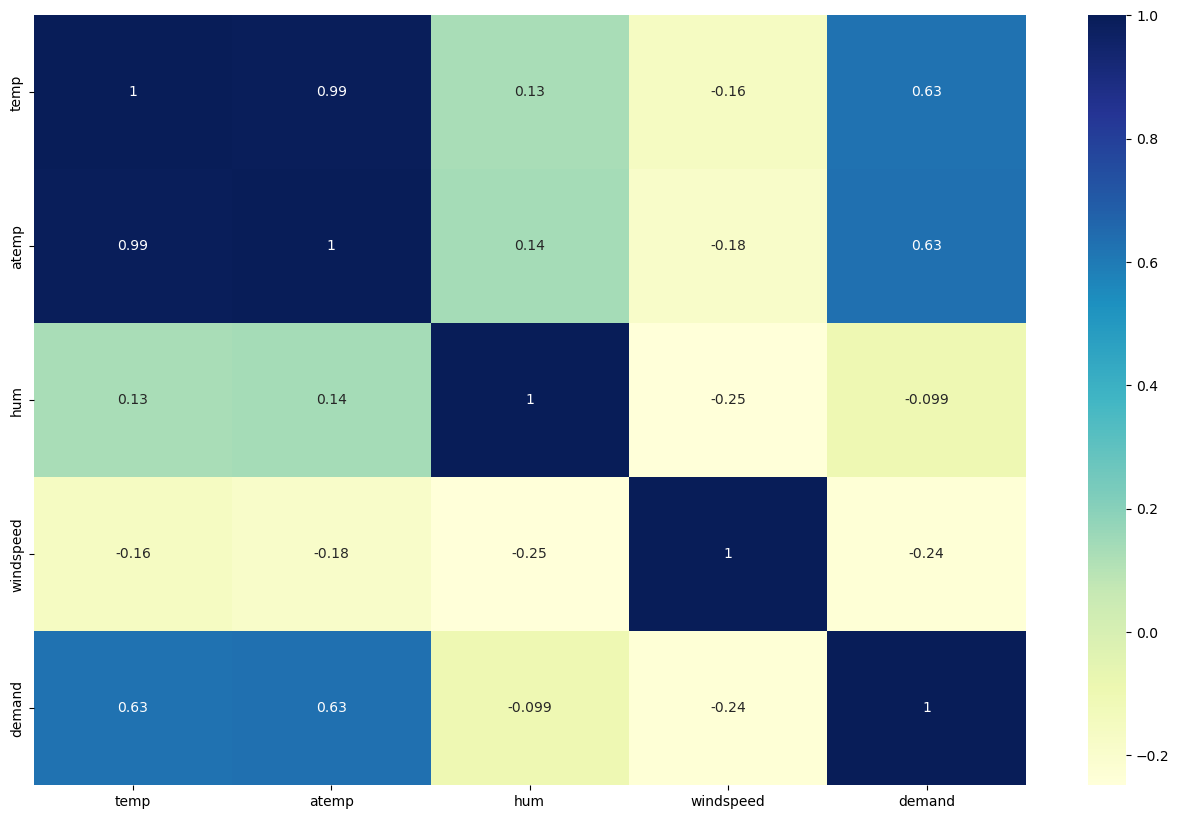

In [18]:
#taking a look at the correlations heat map

plt.figure(figsize=(16, 10))
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [19]:
#it looks like temp and atemp are almost duplicating each other, so we can drop one. 
bike = bike.drop('atemp', axis=1)
bike.head()

,season,yr,month,holiday,weekday,workingday,weather,temp,hum,windspeed,demand
0,spring,2018,Jan,no,sun,no,mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,no,mon,no,mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,no,tue,yes,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,no,wed,yes,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,no,thr,yes,clear,9.305237,43.6957,12.522300,1600


## STEP 3: PREPARING THE DATA FOR THE MODEL

In [20]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  demand      730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 62.9+ KB


In [21]:
#creating the dummies
dummies = pd.get_dummies(bike, columns = ['season','weather','weekday','month','yr', 'holiday', 'workingday' ], drop_first=True)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temp                     730 non-null    float64
 1   hum                      730 non-null    float64
 2   windspeed                730 non-null    float64
 3   demand                   730 non-null    int64  
 4   season_spring            730 non-null    uint8  
 5   season_summer            730 non-null    uint8  
 6   season_winter            730 non-null    uint8  
 7   weather_light_snow_rain  730 non-null    uint8  
 8   weather_mist             730 non-null    uint8  
 9   weekday_mon              730 non-null    uint8  
 10  weekday_sat              730 non-null    uint8  
 11  weekday_sun              730 non-null    uint8  
 12  weekday_thr              730 non-null    uint8  
 13  weekday_tue              730 non-null    uint8  
 14  weekday_wed              7

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [22]:
#dropping the cols not used for dummies before the concat
dummies = dummies.drop(['temp', 'hum', 'windspeed', 'demand'], axis=1)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   season_spring            730 non-null    uint8
 1   season_summer            730 non-null    uint8
 2   season_winter            730 non-null    uint8
 3   weather_light_snow_rain  730 non-null    uint8
 4   weather_mist             730 non-null    uint8
 5   weekday_mon              730 non-null    uint8
 6   weekday_sat              730 non-null    uint8
 7   weekday_sun              730 non-null    uint8
 8   weekday_thr              730 non-null    uint8
 9   weekday_tue              730 non-null    uint8
 10  weekday_wed              730 non-null    uint8
 11  month_Aug                730 non-null    uint8
 12  month_Dec                730 non-null    uint8
 13  month_Feb                730 non-null    uint8
 14  month_Jan                730 non-null    uint8
 15  month_

In [23]:
#concating the dummies frame with the original frame
bike_m = pd.concat([bike, dummies], axis=1)
bike_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   season                   730 non-null    object 
 1   yr                       730 non-null    object 
 2   month                    730 non-null    object 
 3   holiday                  730 non-null    object 
 4   weekday                  730 non-null    object 
 5   workingday               730 non-null    object 
 6   weather                  730 non-null    object 
 7   temp                     730 non-null    float64
 8   hum                      730 non-null    float64
 9   windspeed                730 non-null    float64
 10  demand                   730 non-null    int64  
 11  season_spring            730 non-null    uint8  
 12  season_summer            730 non-null    uint8  
 13  season_winter            730 non-null    uint8  
 14  weather_light_snow_rain  7

In [24]:
#drop redundant columns
bike_m = bike_m.drop(['season', 'weather', 'weekday', 'month', 'yr', 'holiday', 'workingday'], axis=1)
bike_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temp                     730 non-null    float64
 1   hum                      730 non-null    float64
 2   windspeed                730 non-null    float64
 3   demand                   730 non-null    int64  
 4   season_spring            730 non-null    uint8  
 5   season_summer            730 non-null    uint8  
 6   season_winter            730 non-null    uint8  
 7   weather_light_snow_rain  730 non-null    uint8  
 8   weather_mist             730 non-null    uint8  
 9   weekday_mon              730 non-null    uint8  
 10  weekday_sat              730 non-null    uint8  
 11  weekday_sun              730 non-null    uint8  
 12  weekday_thr              730 non-null    uint8  
 13  weekday_tue              730 non-null    uint8  
 14  weekday_wed              7

## Step 3: Model Building

In [25]:
# Splitting into train test data. 

import sklearn
from sklearn.model_selection import train_test_split

In [26]:
df_train, df_test = train_test_split(bike_m, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling

In [27]:
#Resclaing
from sklearn.preprocessing import MinMaxScaler

In [28]:
df_train.columns

Index(['temp', 'hum', 'windspeed', 'demand', 'season_spring', 'season_summer',
       'season_winter', 'weather_light_snow_rain', 'weather_mist',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thr',
       'weekday_tue', 'weekday_wed', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sept', 'yr_2019', 'holiday_yes',
       'workingday_yes'],
      dtype='object')

In [29]:
#list of numerical variables
num_vars = ['temp', 'hum', 'windspeed', 'demand']

#scaler Object
scaler = MinMaxScaler()

#fit and transform on train data 

df_train[num_vars] =  scaler.fit_transform(df_train[num_vars])


In [30]:
df_train.describe()

,temp,hum,windspeed,demand,season_spring,season_summer,season_winter,weather_light_snow_rain,weather_mist,weekday_mon,...,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,yr_2019,holiday_yes,workingday_yes
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,0.345098,0.143137,...,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.507843,0.025490,0.676471
std,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,0.475867,0.350557,...,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.500429,0.157763,0.468282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Create X and Y

In [31]:

#CREATING X AND Y
y_train = df_train.pop('demand')
X_train = df_train
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,weather_light_snow_rain,weather_mist,weekday_mon,weekday_sat,...,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,yr_2019,holiday_yes,workingday_yes
576,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
426,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
728,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
111,0.345824,0.751824,0.380981,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


## Defining some functions to build and model and evalute it. 

In [32]:
#importing required libs

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
#fits a stats model then outputs and returns the summary

def build_stats_model(y_train, X_train):
    #add a constant
    X_train_sm = sm.add_constant(X_train)
    #create the model
    lr = sm.OLS(y_train.astype(float), X_train_sm.astype(float))
    #fit the model
    lr_model = lr.fit()

    #print summary
    print(lr_model.summary())

    #return model
    return lr_model



In [34]:
#displays the VIF

def check_VIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    values = np.array(X_train.values, dtype=float)
    vif['VIF'] = [variance_inflation_factor(values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)

In [35]:
#works as a wrapper for the two functions above. 
# This Builds a stats model, show the summary and returns the model
# Also displays the VIF

def evaluate_model(y_train, X_train):
    #Building Model and Showing Summary
    lr_model = build_stats_model(y_train, X_train)
    #displaying VIF
    check_VIF(X_train)
    return lr_model

### RFE Feature selection

#### Since we have a lot of columns, Lets use RFE

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)
#selecting top 14 to start with out of 28
rfe = RFE(lm, step = 14)            
rfe = rfe.fit(X_train, y_train)


In [42]:
#display the RFE
rfe_scr = pd.DataFrame()
rfe_scr['columns'] = X_train.columns
rfe_scr['rank'] = rfe.ranking_
rfe_scr['support'] = rfe.support_
rfe_scr = rfe_scr.sort_values(by = 'rank', ascending= True)
rfe_scr.head(30)

,columns,rank,support
0,temp,1,True
15,month_Dec,1,True
26,holiday_yes,1,True
22,month_Nov,1,True
24,month_Sept,1,True
7,weather_mist,1,True
25,yr_2019,1,True
5,season_winter,1,True
4,season_summer,1,True
3,season_spring,1,True


In [43]:
#Filtering X_train with top 14 columns. 

top_14_cols = X_train.columns[rfe.support_]
X_train_rfe = X_train[top_14_cols]
X_train_rfe.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temp                     510 non-null    float64
 1   hum                      510 non-null    float64
 2   windspeed                510 non-null    float64
 3   season_spring            510 non-null    uint8  
 4   season_summer            510 non-null    uint8  
 5   season_winter            510 non-null    uint8  
 6   weather_light_snow_rain  510 non-null    uint8  
 7   weather_mist             510 non-null    uint8  
 8   month_Dec                510 non-null    uint8  
 9   month_Jan                510 non-null    uint8  
 10  month_Nov                510 non-null    uint8  
 11  month_Sept               510 non-null    uint8  
 12  yr_2019                  510 non-null    uint8  
 13  holiday_yes              510 non-null    uint8  
dtypes: float64(3), uint8(11)

### Building and checking summary of LR model using the predefined function
### shows model summary and VIF




In [44]:
lr_model = evaluate_model(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          5.38e-188
Time:                        23:25:09   Log-Likelihood:                 509.49
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     495   BIC:                            -925.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [45]:
#hum has an alarming VIF, so we should drop it first.

X_train_rfe = X_train_rfe.drop('hum', axis=1)

In [46]:
#reevaluet model 

lr_model = evaluate_model(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.23e-185
Time:                        23:25:38   Log-Likelihood:                 501.12
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     496   BIC:                            -915.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [48]:
#All VIF is in acceptable range now, also all p values significant. 
# Still month_Nov has a sightly higher p value almost close to 0.05, lets see if droping that improves our model 

X_train_rfe = X_train_rfe.drop('month_Nov', axis=1)

In [49]:
#reevaluet model 

lr_model = evaluate_model(y_train, X_train_rfe)


                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.2
Date:                Tue, 02 May 2023   Prob (F-statistic):          6.53e-186
Time:                        23:29:35   Log-Likelihood:                 498.99
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     497   BIC:                            -916.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [50]:
#All VIF's are still good, but month_Dec has a high p value now. Lets drop that. 

X_train_rfe = X_train_rfe.drop('month_Dec', axis=1)

In [51]:
#reevaluete model 

lr_model = evaluate_model(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.96e-186
Time:                        23:35:55   Log-Likelihood:                 497.40
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Now the model looks well trained with 83.4% Inference and all p-values are < 0.05 and VIF is <5 for all columns

### Still lets take a look at the corr heat map, box plots and compare our feature sections. 

#### It seems the selection also makes sense visually to me, so I am happy with the feature selection.


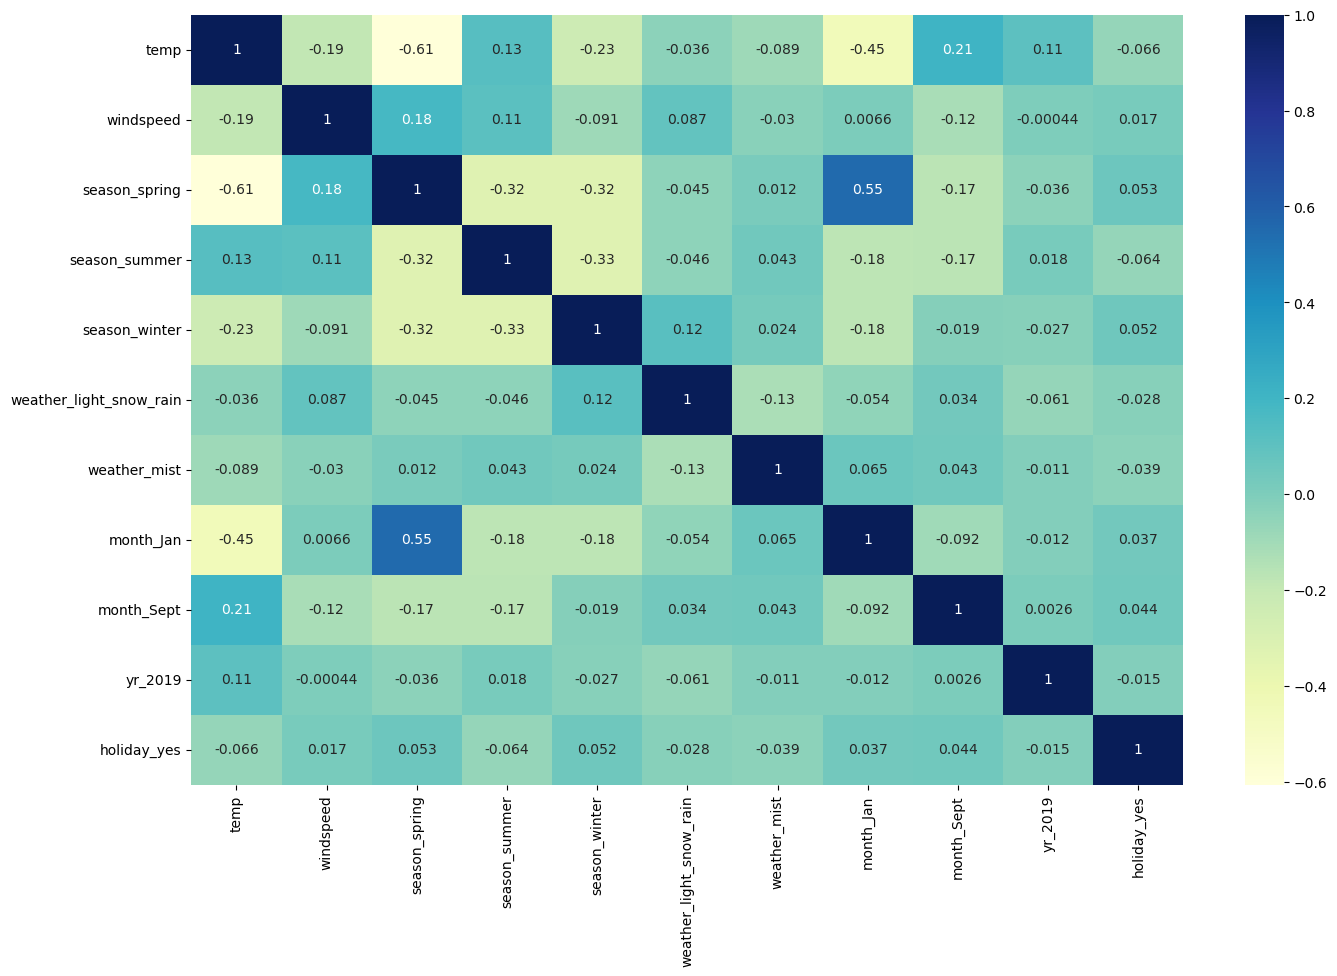

In [53]:
plt.figure(figsize=(16, 10))
sns.heatmap(X_train_rfe.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [54]:
## These are the final section of columns

X_train_rfe.columns

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'weather_light_snow_rain', 'weather_mist', 'month_Jan', 'month_Sept',
       'yr_2019', 'holiday_yes'],
      dtype='object')

## STEP 4: Residual Analysis

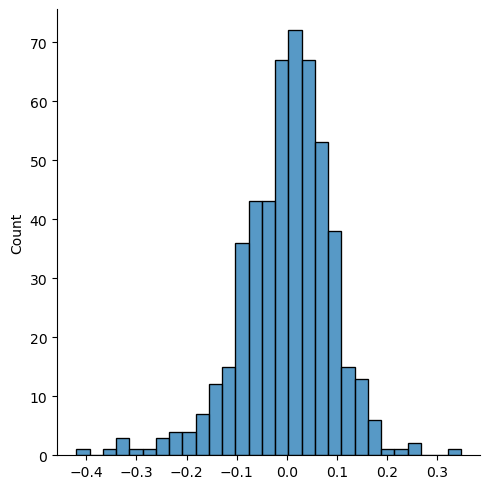

In [55]:
#Residual Analysis

X_train_sm = sm.add_constant(X_train_rfe)

y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.displot(res)
plt.show()

### Error terms are normally distributed. So we are in good shape. 

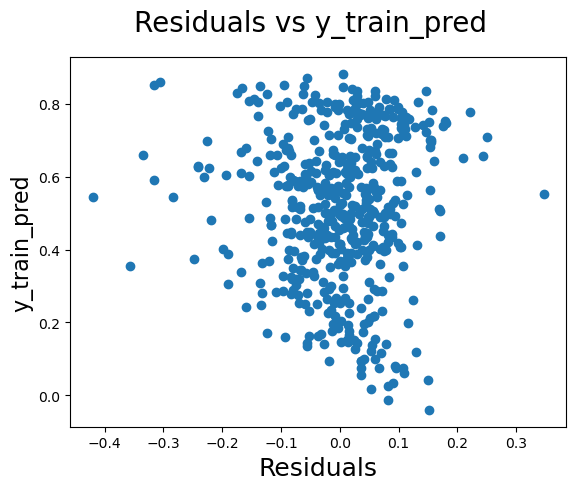

In [84]:
# Looking for patterns in the residuals

fig = plt.figure()
plt.scatter(res, y_train_pred)
fig.suptitle('Residuals vs y_train_pred', fontsize=20)
plt.xlabel('Residuals', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)  
plt.show()

### There are no visible patterns in the residuals and they seem to be centered to 0.

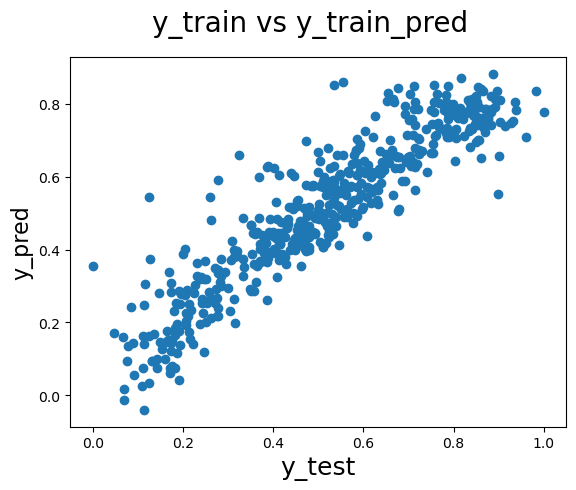

In [76]:
# Plotting y_train and y_train_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

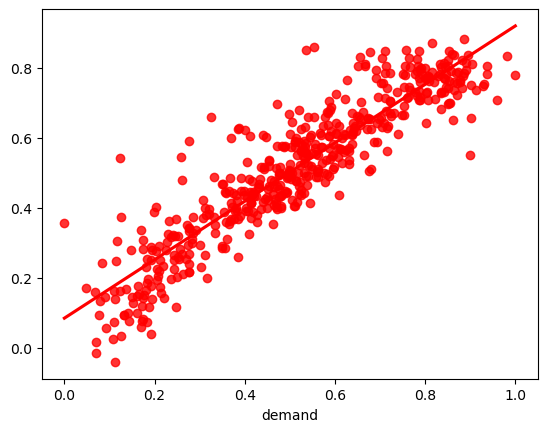

In [81]:
#Drawig the fitted line in training data
sns.regplot(x=y_train,y=y_train_pred,ci=None,color ='red')
plt.show()

## STEP 5: Prediction and Evaluation on Test Set

### Scaling and Transforming Test Data

In [63]:
# Scale and Transform the test data

#list of numerical variables
num_vars = ['temp', 'hum', 'windspeed', 'demand']

#transform on test data 

df_test[num_vars] =  scaler.transform(df_test[num_vars])
df_test.describe()

,temp,hum,windspeed,demand,season_spring,season_summer,season_winter,weather_light_snow_rain,weather_mist,weekday_mon,...,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,yr_2019,holiday_yes,workingday_yes
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.027273,0.318182,0.145455,...,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.481818,0.036364,0.700000
std,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.163248,0.466833,0.353363,...,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.500809,0.187620,0.459303
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Create X and Y on Test Data

In [64]:
#creating y_test and X_test
y_test = df_test.pop('demand')
X_test = df_test
X_test.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,weather_light_snow_rain,weather_mist,weekday_mon,weekday_sat,...,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,yr_2019,holiday_yes,workingday_yes
184,0.831783,0.657364,0.084219,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
535,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
299,0.511964,0.837699,0.334206,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
221,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [65]:
#adding sm constant

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,temp,hum,windspeed,season_spring,season_summer,season_winter,weather_light_snow_rain,weather_mist,weekday_mon,...,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,yr_2019,holiday_yes,workingday_yes
184,1.0,0.831783,0.657364,0.084219,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
535,1.0,0.901354,0.610133,0.153728,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
299,1.0,0.511964,0.837699,0.334206,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
221,1.0,0.881625,0.437098,0.339570,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,1.0,0.817246,0.314298,0.537414,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### Drop features as per selection in Train Data

In [66]:
X_train_rfe.columns

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'weather_light_snow_rain', 'weather_mist', 'month_Jan', 'month_Sept',
       'yr_2019', 'holiday_yes'],
      dtype='object')

In [67]:
X_test_sm.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weather_light_snow_rain', 'weather_mist',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thr',
       'weekday_tue', 'weekday_wed', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sept', 'yr_2019', 'holiday_yes',
       'workingday_yes'],
      dtype='object')

In [68]:
#dropping features preparation

keep_features = list(X_train_rfe.columns)
keep_features.insert(0, 'const')
keep_features


['const',
 'temp',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'weather_light_snow_rain',
 'weather_mist',
 'month_Jan',
 'month_Sept',
 'yr_2019',
 'holiday_yes']

In [69]:
#dropping features
X_test_sm = X_test_sm[keep_features]
X_test_sm.columns

Index(['const', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weather_light_snow_rain', 'weather_mist', 'month_Jan',
       'month_Sept', 'yr_2019', 'holiday_yes'],
      dtype='object')

### Making Prediction

In [70]:
# predict

y_test_pred = lr_model.predict(X_test_sm)

## Evaluate the Model on Test Data

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(y_true= y_test, y_pred=y_test_pred)

0.8008869691998375

# The Model shows very close r2 score for TRAIN - 83.4 TEST - 80
# Hence we can conclude that the model is well generalized and not over-fit. 
# All Cofficiants are revalant as the p-value for all the selected features is within the allowed range < 0.05


<Figure size 640x480 with 0 Axes>

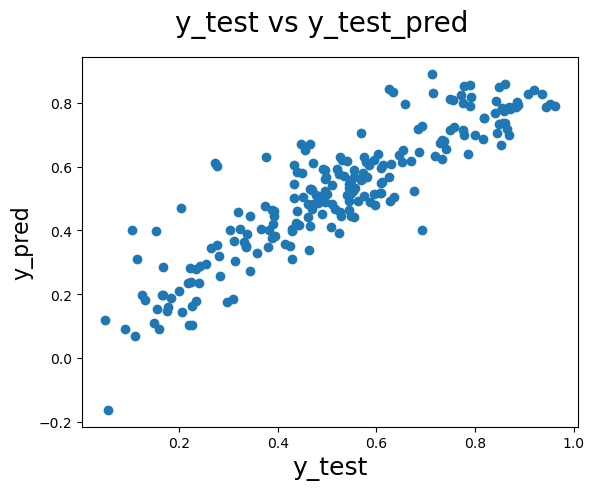

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

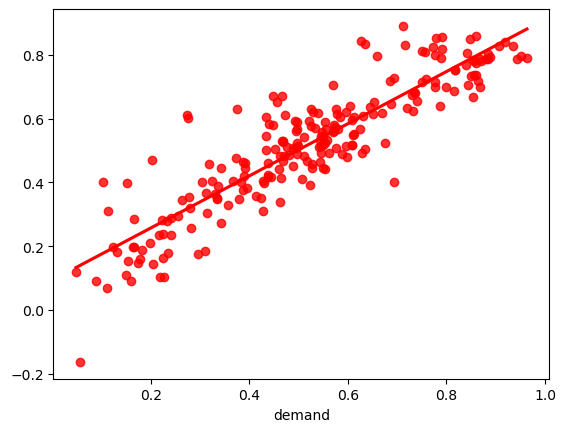

In [80]:
#Drawig the fitted line in test data
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')
plt.show()

In [82]:
## Printing the coff for further refernce. 

lr_model.params

const                      0.207978
temp                       0.458296
windspeed                 -0.155470
season_spring             -0.050043
season_summer              0.058266
season_winter              0.087618
weather_light_snow_rain   -0.286295
weather_mist              -0.077852
month_Jan                 -0.040339
month_Sept                 0.090036
yr_2019                    0.234864
holiday_yes               -0.095612
dtype: float64

## Final EQUATION:

### demand = 0.207978 + 0.458296 x temp - 0.155470 x windspeed - 0.050043 x season_spring +  0.058266 x season_summer +  0.087618 x season_winter - 0.286295 x weather_light_snow_rain - 0.077852 x weather_mist - 0.040339 x month_Jan + 0.090036 x month_Sept + 0.234864 x yr_2019 - 0.095612 x holiday_yes